<a href="https://colab.research.google.com/github/franfasan1/DH_G8_desafio3/blob/main/Copia_de_notebook_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Los datos que se presentan en el siguiente ejercicio están relacionados con campañas de marketing de una institución bancaria de Portugal. Dichas campañas se basaron en llamadas telefónicas, las cuales muestran que a menudo más de un contacto con el mismo cliente fue realizado para poder acceder al producto (depósito a plazo fijo en el banco), estableciendo si sería un "sí" o "no" candidato potencial a contratar un plazo fijo.

In [116]:
data = pd.read_csv('bank_customer_survey.csv')

In [117]:
#guardamos una copia del dataset para la ejecución del baseline.
df_baseline = data.copy()

In [119]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0


# Análisis Exploratorio

Antes de empezar a trabajar en el modelo de clasificación es importante visualziar los datos, validar su estructura y entender las relaciones entre las variables

Comencemos analizando la existencia o no de valores nulos

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


El dataset que se presenta contiene 45.211 observaciones con 16 features a analizar, sin ningún valor nulo. A continuación se muestra todos los nombres de las variables y una breve descripción.

Age: edad del cliente

- Age: edad del cliente
- Job: tipo de trabajo
- Marital: estado civil
- Education: grado de educación
- Default: ¿tiene crédito en mora?
- Balance: Saldo de la cuenta
- Housing: ¿tiene préstamo para hipotecario?
- Loan: ¿tiene préstamo personal?
- Contact: comunicación, tipo de contacto
- Day: día del mes
- Month: último mes de contacto en el año
- Duration: duración del último contacto, en segundos
- Campaign: número de contactos realizados durante esta campaña para este cliente (incluido el último contacto)-
- p-days: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior
- previous: número de contactos realizados antes de esta campaña para este cliente
- p-outcome: resultado de la campaña de marketing anterior
- y: ¿El cliente ha contratado un depósito a plazo?


Además se ve que los tipos de dato son bastante coherentes con lo que se ve reflejado en el vistazo que le dimos a la tabla. En este sentido, una variable a la que podríamos cambiarle su "tipo" es ***day*** ya que representa el día de la semana y no tiene sentido que sea numérica, sino **categórica**.


In [121]:
#por que es necesario transformar a categorica si después vamos a convertir en dummy?
data['day'] = data.day.astype('category')

Ya que estamos convertimos todos los datos que entendemos categoricos a *category*

In [122]:
columnas = data.columns

for col in columnas:
  if data[col].dtype == 'object':
    data[col] = data[col].astype('category')

Ahora que tenemos todo esto medio armado podemos empezar a analizar nuestra data. Empecemos estudiando como se distribuye cada una de las variables según la respuesta que buscamos, para después pasar a ver como se relacionan entre ellas

<AxesSubplot:xlabel='age'>

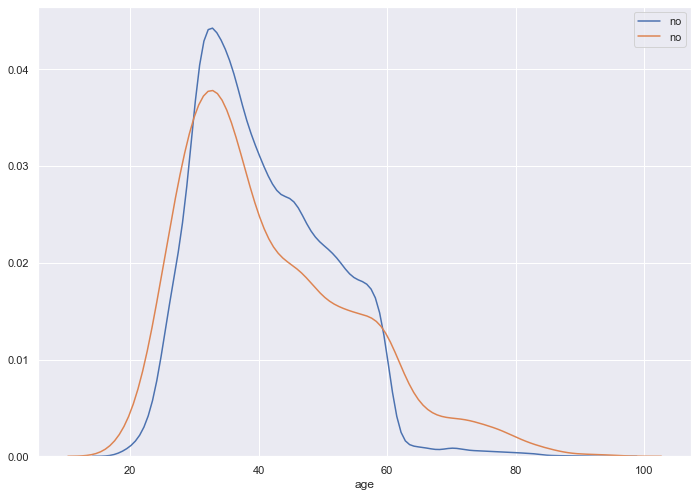

In [123]:
sns.distplot(data[data.y == 0].age, hist = False, norm_hist= True, label = "no")
sns.distplot(data[data.y == 1].age, hist = False, norm_hist= True, label = "no")

In [124]:
data['age_cat'] = data.age.apply(lambda x: '>60' if x >= 60 else('<40' if x <=40 else "40-60"))

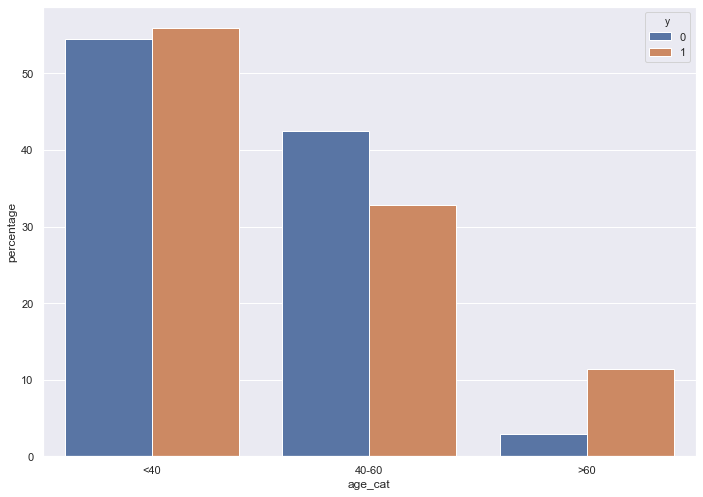

In [125]:
a = data.groupby('y')['age_cat'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
g = sns.barplot(x = 'age_cat', y = 'percentage', hue = 'y', data = a)

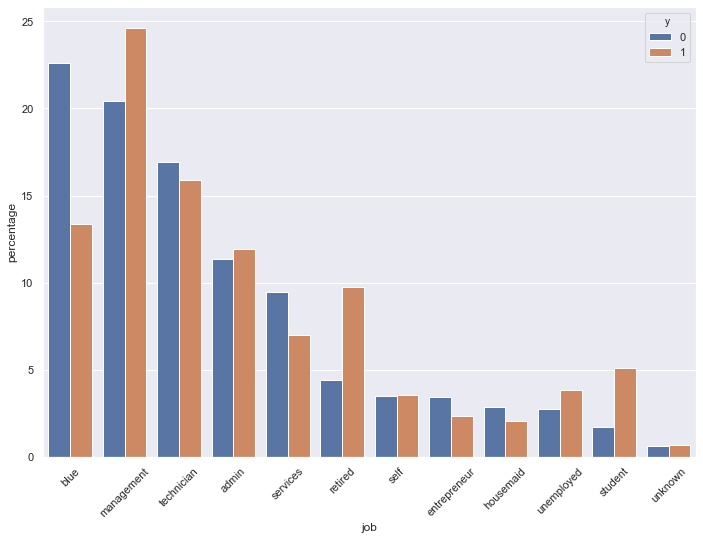

In [126]:
a = data.groupby('y')['job'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
g = sns.barplot(x = 'job', y = 'percentage', hue = 'y', data = a)
g.set_xticklabels(g.get_xticklabels(), minor = False, rotation = 45);

In [127]:
data.groupby('job')['y'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()

,job,y,percentage
0,admin,0,87.797331
1,admin,1,12.202669
2,blue,0,92.725031
3,blue,1,7.274969
4,entrepreneur,0,91.728312
5,entrepreneur,1,8.271688
6,housemaid,0,91.209677
7,housemaid,1,8.790323
8,management,0,86.244449
9,management,1,13.755551


In [128]:
job_mas_comun = data.job.mode()
job_mas_comun[0]
data['job'] = data.job.apply(lambda x: job_mas_comun[0] if x == 'unknown' else x)

<AxesSubplot:xlabel='marital', ylabel='percentage'>

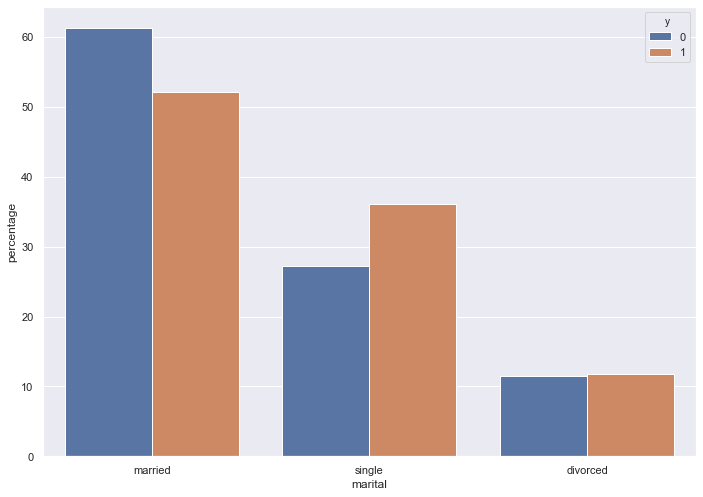

In [129]:
a = data.groupby('y')['marital'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'marital', y = 'percentage', hue = 'y', data = a)

Se observa claramente que los solteros y los divorciados tienen una tendencia superior a realizar depósitos en plazo fijo mayor a los casados

<AxesSubplot:xlabel='education', ylabel='percentage'>

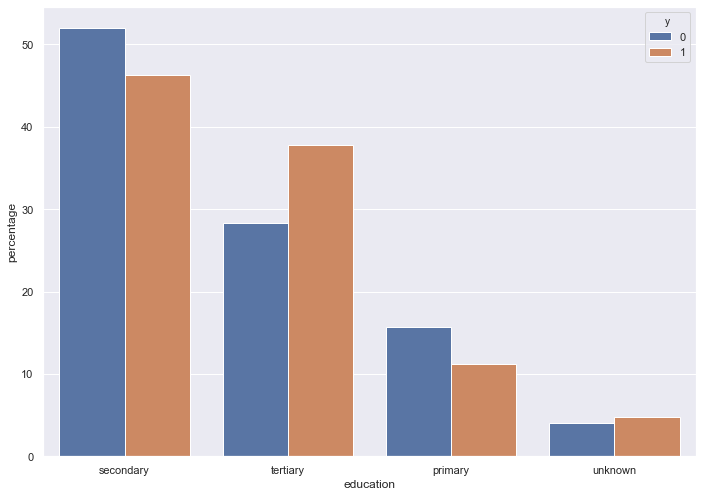

In [130]:
a = data.groupby('y')['education'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'education', y = 'percentage', hue = 'y', data = a)

<AxesSubplot:xlabel='job', ylabel='percentage'>

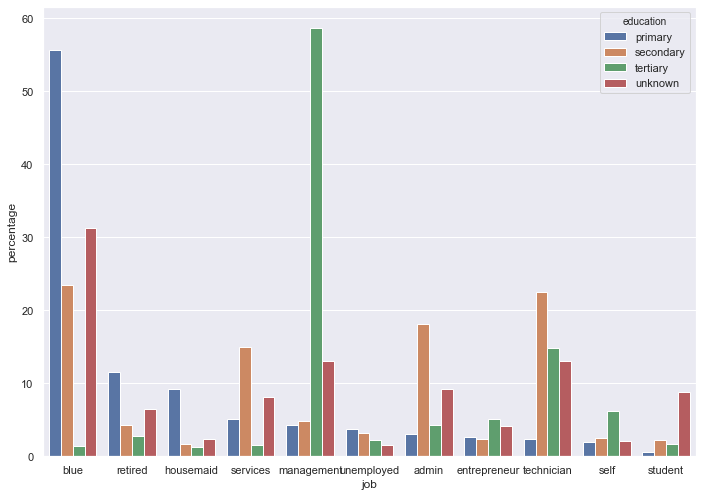

In [131]:
a = data.groupby('education')['job'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'job', y = 'percentage', hue = 'education', data = a)

In [132]:
tabla = data.groupby('job')['education'].agg(lambda x: x.value_counts().index[0])

for i in range(0, data.shape[0]-1):
  if data.education[i] == 'unknown':
    for j in range(0, tabla.shape[0]-1):
      if data.job[i] == tabla.index[j]:
        data.education[i] = tabla[j]

data['education'] = data.education.apply(lambda x: np.NaN if x == 'unknown' else x)
data.education.dropna(inplace=True)

A priori parece algo razonable pensar que las personas con mayor nivel educativo son mas propensos a realizar depósitos a plazo fijo, tal vez pueda ser que su excedente monetario sea mayor que en el resto de los casos o porque tienen mayor educación financiera. Se ven un pequeño porcentaje de *unkowns* que representan valores nulos y deberíamos imputarlos o removerlos

<AxesSubplot:xlabel='default', ylabel='percentage'>

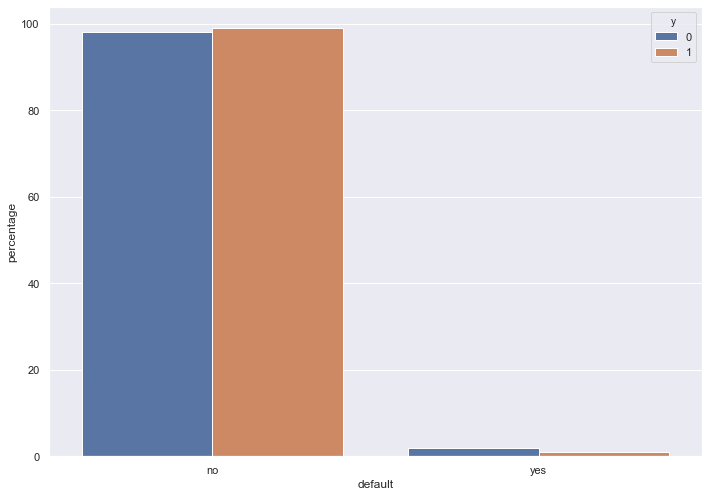

In [133]:
a = data.groupby('y')['default'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'default', y = 'percentage', hue = 'y', data = a)

Resulta bastante lógico pensar que los casos con default crediticio ni siquiera sean contactados para ofrecerles un plazo fijo, y que en caso de sean contactados, la tasa de aceptación sea menor

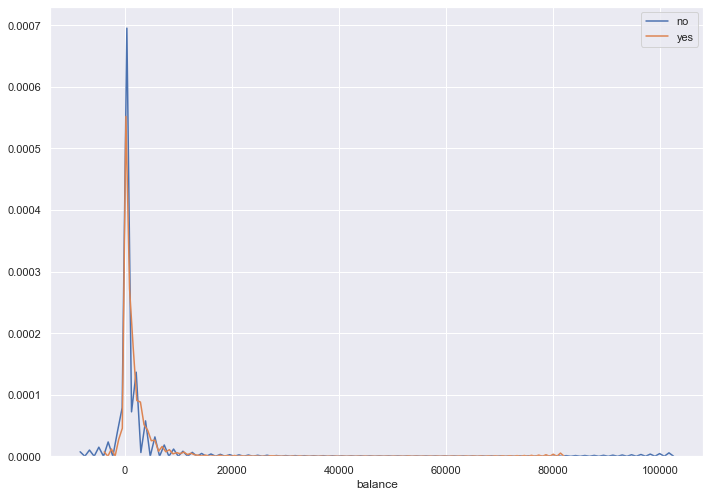

In [134]:
sns.distplot(data[data.y == 0].balance, hist = False, norm_hist= True, label = "no")
sns.distplot(data[data.y == 1].balance, hist = False, norm_hist= True, label = "yes")
plt.legend()

<AxesSubplot:xlabel='y', ylabel='balance'>

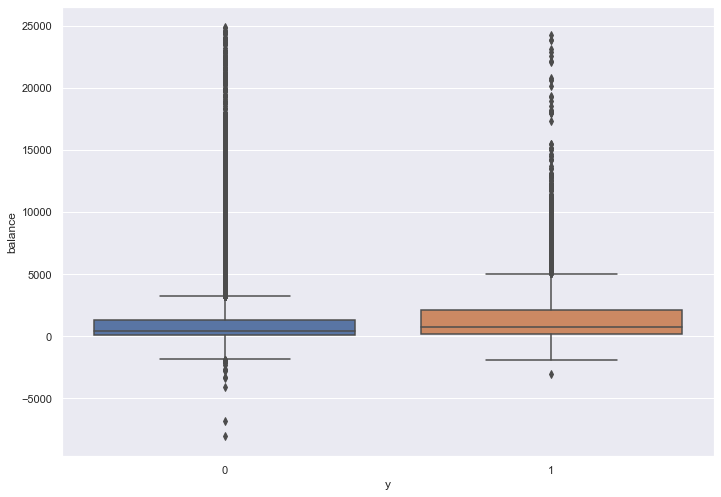

In [135]:
sns.boxplot(x = data.y, y = (data[data.balance < 25000].balance))

Aca vamos a tener que trabajar un poco sobre los outliers, ya que hay valores muy extremos. Dado que se trata de los saldos de cuentas bancarias otra buena posibilidad sería transformar la variable con un *ln* para normalizarla

<AxesSubplot:xlabel='loan', ylabel='percentage'>

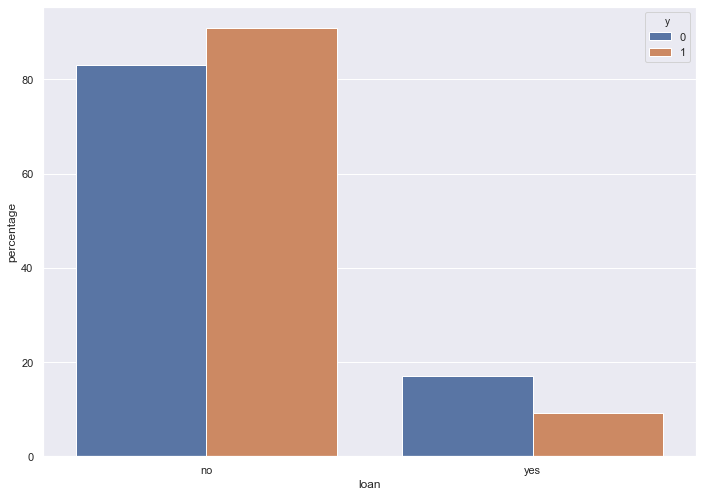

In [136]:
a = data.groupby('y')['loan'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'loan', y = 'percentage', hue = 'y', data = a)

<AxesSubplot:xlabel='housing', ylabel='percentage'>

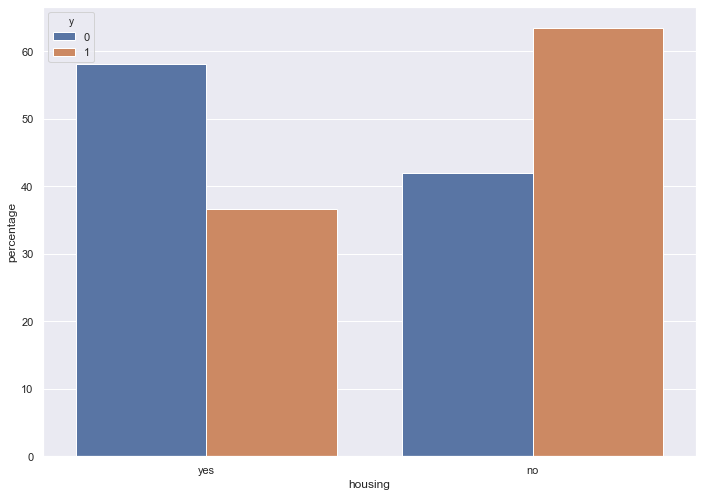

In [137]:
a = data.groupby('y')['housing'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'housing', y = 'percentage', hue = 'y', data = a)

Esta claro que aquellos usuarios que no tienen prestamos personales o hipotecarios son mas propensos a realizr un depósito en plazo fijo que aquellosq ue tienen deudas que saldar a fin de mes

<AxesSubplot:xlabel='contact', ylabel='percentage'>

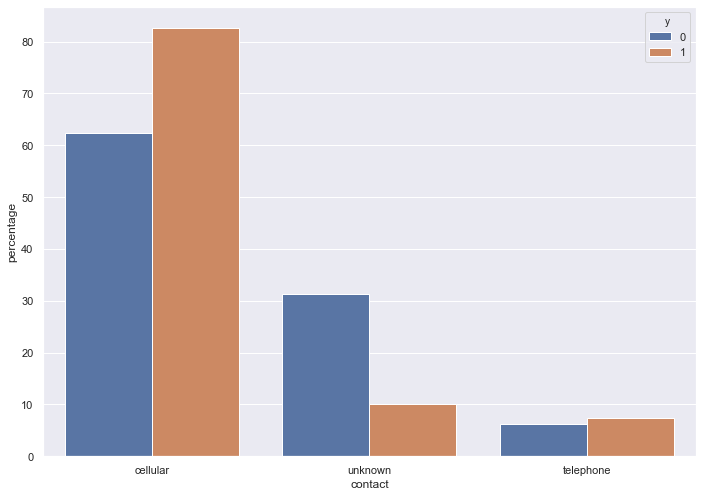

In [138]:
a = data.groupby('y')['contact'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'contact', y = 'percentage', hue = 'y', data = a)

<AxesSubplot:xlabel='education', ylabel='percentage'>

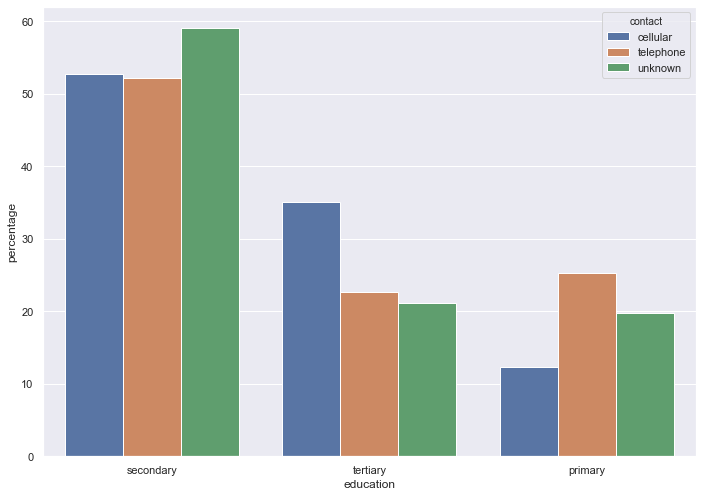

In [139]:
a = data.groupby('contact')['education'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'education', y = 'percentage', hue = 'contact', data = a)

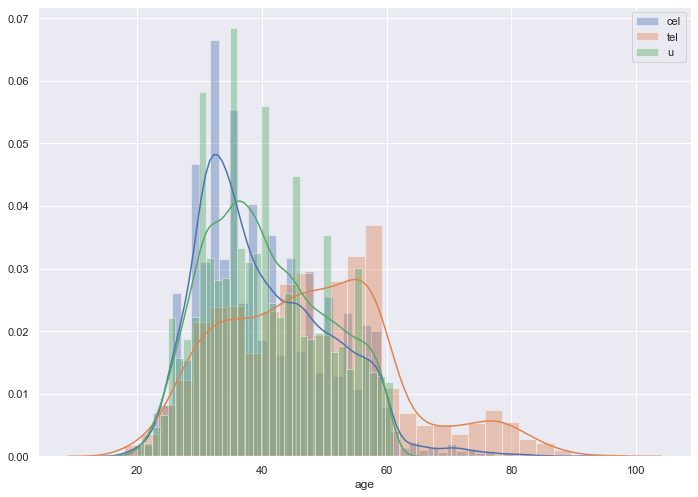

In [140]:
sns.distplot(data[data.contact == 'cellular'].age, label= 'cel')
sns.distplot(data[data.contact == 'telephone'].age, label = 'tel')
sns.distplot(data[data.contact == 'unknown'].age, label = 'u')
plt.legend()

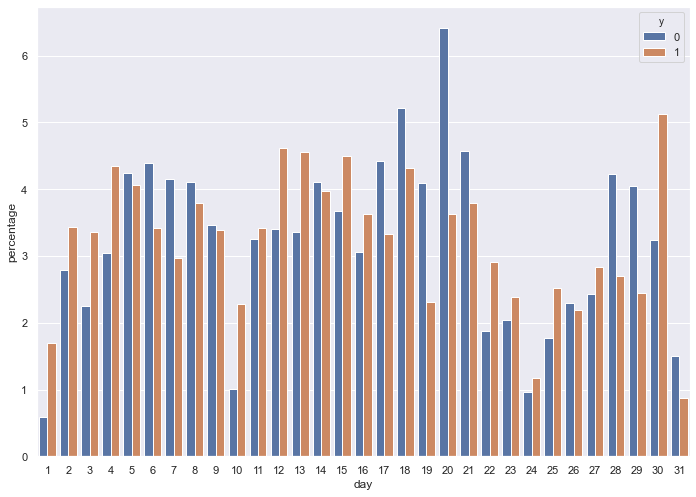

In [141]:
a = data.groupby('y')['day'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'day', y = 'percentage', hue = 'y', data = a)
sns.set(rc={'figure.figsize':(16,8.27)})

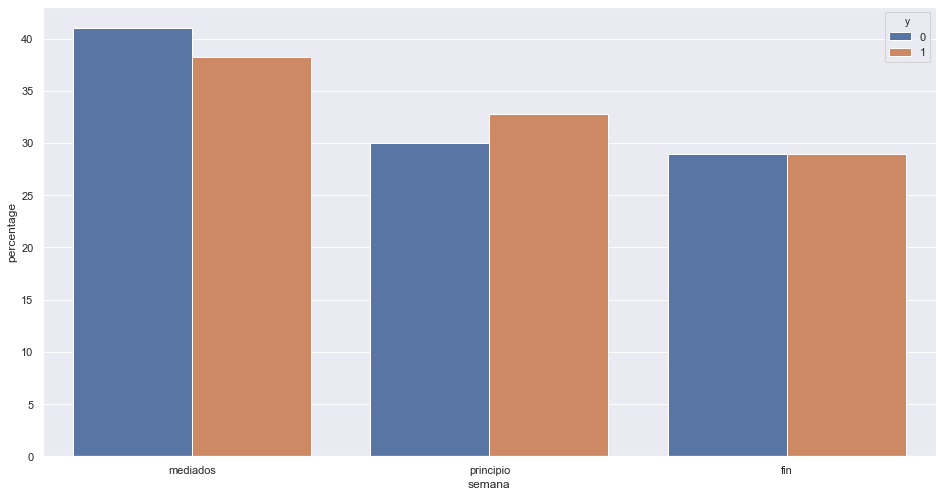

In [142]:
data['semana'] = data.day.apply(lambda x: 'principio' if x <= 10 else ('mediados' if ((x > 10) and (x <= 20)) else 'fin'))
a = data.groupby('y')['semana'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'semana', y = 'percentage', hue = 'y', data = a)
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='month', ylabel='percentage'>

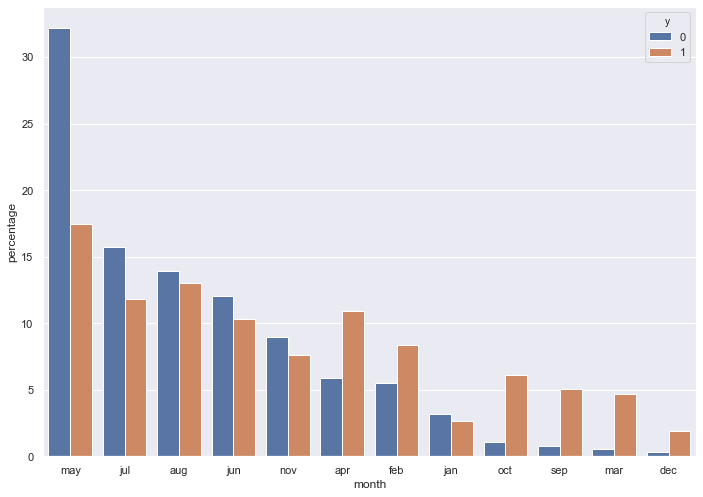

In [143]:
a = data.groupby('y')['month'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'month', y = 'percentage', hue = 'y', data = a)

<AxesSubplot:xlabel='quarter', ylabel='percentage'>

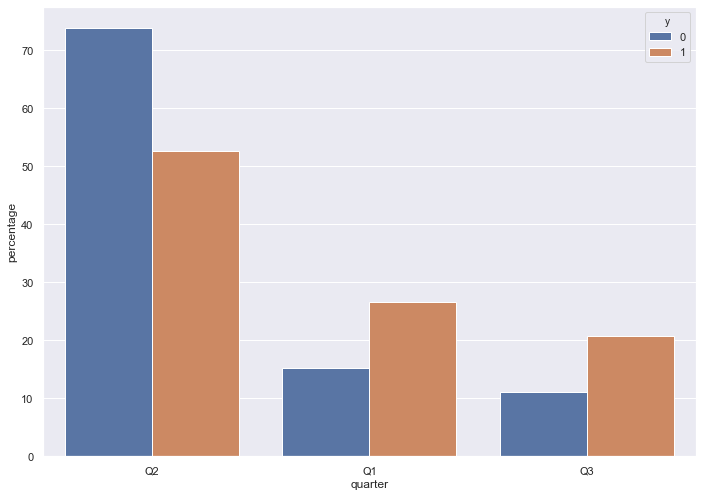

In [144]:
data['quarter'] = data.month.apply(lambda x: 'Q1' if x in ['jan', 'feb', 'mar', 'apr'] else ('Q2' if x in ['may', 'jun', 'jul', 'aug'] else 'Q3'))
a = data.groupby('y')['quarter'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'quarter', y = 'percentage', hue = 'y', data = a)

Se ve que los contactos tienen un efecto positivo al principio y al final del año, mientras que en el cuatrimestre intermedio las personas tienen una menor tendencia a realizar depósitos, tal vez por mayor incertidumbre respecto a lo que podría suceder con sus ahorros

(array([ 605., 2313., 2118., 1830., 1205.,   96.,   39.,   18.,   18.,
          15.]),
 array([  1.,  88., 175., 262., 349., 436., 523., 610., 697., 784., 871.]),
 <BarContainer object of 10 artists>)

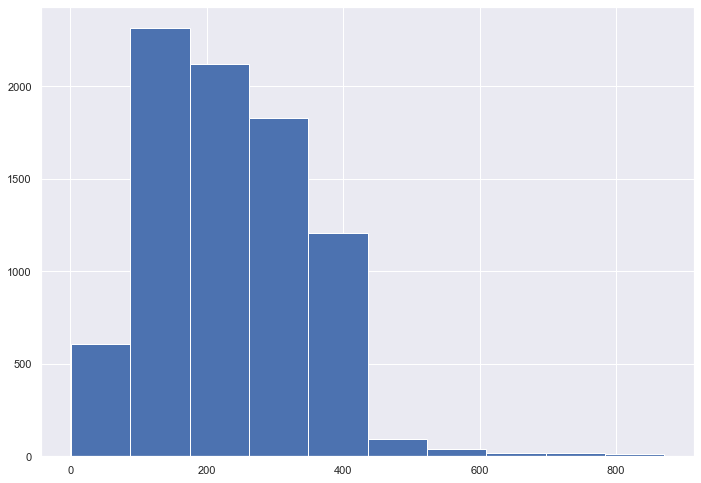

In [145]:
plt.hist(x = 'pdays',  data = data[data['pdays'] >-1], bins = 10)

<AxesSubplot:xlabel='poutcome', ylabel='percentage'>

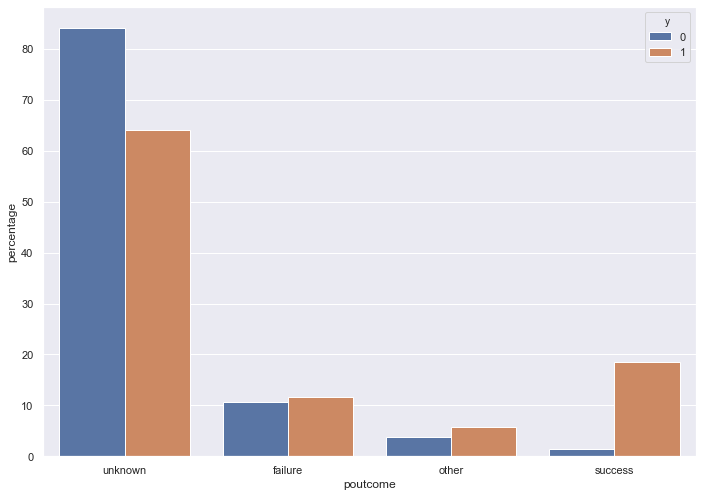

In [146]:
a = data.groupby('y')['poutcome'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'poutcome', y = 'percentage', hue = 'y', data = a)

In [147]:
data['poutcome'] = data.apply(lambda x: 'sin contacto' if x['pdays'] == -1 else x['poutcome'], axis = 1)
data['poutcome'] = data.poutcome.apply(lambda x: np.NaN if x == 'unknown' else x)
data.dropna(axis = 0, inplace = True)

In [148]:
other_per = data[(data.poutcome == 'success') | (data.poutcome == 'failure')].poutcome.value_counts() / data[(data.poutcome == 'success') | (data.poutcome == 'failure')].shape[0]

success = other_per[1]
fail = other_per[0]

In [149]:
data['poutcome'] = data.poutcome.apply(lambda x: np.NaN if x == 'other' else x)
data['poutcome'] = data.poutcome.apply(lambda x: 'failure' if ((x is np.NaN) & (np.random.uniform() < fail)) else ('success' if x is np.NaN else x))

In [150]:
data['range_pdays'] = data.pdays.apply(lambda x: 'LARGO' if x >= 400 else ('MEDIO' if x >=200 else ('CORTO' if x >=0 else 'OTRO')))
data[(data.pdays < 200) ]

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_cat,semana,quarter,range_pdays
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,sin contacto,0,40-60,principio,Q2,OTRO
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,sin contacto,0,40-60,principio,Q2,OTRO
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,sin contacto,0,<40,principio,Q2,OTRO
3,47,blue,married,secondary,no,1506,yes,no,unknown,5,...,92,1,-1,0,sin contacto,0,40-60,principio,Q2,OTRO
4,33,blue,single,secondary,no,1,no,no,unknown,5,...,198,1,-1,0,sin contacto,0,<40,principio,Q2,OTRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,977,3,-1,0,sin contacto,1,40-60,mediados,Q3,OTRO
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,456,2,-1,0,sin contacto,1,>60,mediados,Q3,OTRO
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1127,5,184,3,success,1,>60,mediados,Q3,CORTO
45209,57,blue,married,secondary,no,668,no,no,telephone,17,...,508,4,-1,0,sin contacto,0,40-60,mediados,Q3,OTRO


In [151]:
#Eliminamos los outliers detectados para Balance
data = data[data.balance < 50000]

# Baseline

In [310]:
# para tener una referencia sobre los resultados esperables para este modelo, correremos sobre los datos originales 
# un estimador NB. 

# La unica conversión a realizar es de variables categoricas originales en dummies para poder incluirlas en la ejecucion.
# Tambien debemos exlcuir Durantion  ya que como indica la doc. del dataset, no está disponible al momento de realizar la prediccion. 

df_baseline= df_baseline[df_baseline.housing == 'no']

cat = pd.DataFrame(df_baseline.dtypes[df_baseline.dtypes == 'object']).reset_index()['index']
num = pd.DataFrame(df_baseline.dtypes[df_baseline.dtypes != 'object']).reset_index()['index']

# convertimos en dummies las variables categoricas del Dataset
dummies_baseline = pd.get_dummies(df_baseline[cat], drop_first = True)

# features númericas para conformar el df final. La clase ('y') es númerica, queda dentro de este subset.
num_baseline = df_baseline[num]
num_baseline.drop('duration', inplace = True, axis = 1)

#concatenamos ambos nuevamente en un único dataset con las variables cat como dummies y las númericas. 
baseline = pd.concat([num_baseline, dummies_baseline], axis = 1)


#creamos matriz de features y vector resultados y creamos Train y Test.
y = baseline.y
X = baseline.drop('y',  axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1000)


# colstd = (X_train.dtypes[X_train.dtypes == 'int64'].reset_index()['index']).to_list()
# coldum = (X_train.dtypes[X_train.dtypes != 'int64'].reset_index()['index']).to_list()


#Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_NB = gnb.predict(X_test)
y_pred_proba_NB = gnb.predict_proba(X_test)

print("Accuracy Baseline:" , round(accuracy_score(y_test, y_pred_NB), 2))

conf_mat_NB = confusion_matrix(y_test, y_pred_NB)

print('\nConfusion matrix Baseline:\n\n', conf_mat_NB)
#print('\nConfusion matrix NB % del Total:\n\n', (conf_mat / (Y_test.size))*100)
print('\nRecall Baseline:\n', recall_score(y_test, y_pred_NB))

print('\nPrecision Baseline:\n', precision_score(y_test, y_pred_NB))

print('\nF1_score Baseline:\n', f1_score(y_test,y_pred_NB))

print('\nAUC:\n', round(roc_auc_score(y_test, y_pred_NB),3))

#comparado contra el modelo nulo
print('\nModelo Nulo:\n\n',y_test.value_counts(normalize = True))
#el modelo nulo es mejor en Accuracy por el desbalanceo de clases de los datos.


Accuracy Baseline: 0.8

Confusion matrix Baseline:

 [[4715  805]
 [ 528  579]]

Recall Baseline:
 0.5230352303523035

Precision Baseline:
 0.41835260115606937

F1_score Baseline:
 0.4648735447611401

AUC:
 0.689

Modelo Nulo:

 0    0.832956
1    0.167044
Name: y, dtype: float64


# Modelado

In [70]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion, Parallel, make_union
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [71]:
#Se intentó agregando features polinomiales de mayor grado, pero empeoró el resultado. 
#data.to_csv('data_eda.csv')
# data['age_2'] = (data['age'])**2
# data['age_bal'] = (data['age'])*(data['balance'])
# data['age_pre'] = (data['age'])*(data['previous'])
# data['bal_pre'] = (data['balance'])*(data['previous'])
# data['bal_2'] = (data['balance'])**2
# data['previous_2'] = (data['previous'])**2

In [72]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_cat,semana,quarter,range_pdays
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,sin contacto,0,40-60,principio,Q2,OTRO
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,sin contacto,0,40-60,principio,Q2,OTRO
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,sin contacto,0,<40,principio,Q2,OTRO
3,47,blue,married,secondary,no,1506,yes,no,unknown,5,...,92,1,-1,0,sin contacto,0,40-60,principio,Q2,OTRO
4,33,blue,single,secondary,no,1,no,no,unknown,5,...,198,1,-1,0,sin contacto,0,<40,principio,Q2,OTRO


In [89]:
# Modeloado apuntando solo a clientes sin credito hipotecario.
mask = data.housing == 'no'

X = data[mask].drop('y', axis = 1)
y = data[mask].y



In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1000)

In [102]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(X[self.columns])
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")
    
    def fit(self, X, *_):
        return self

In [206]:
numeric_features = Pipeline([('column_selector', ColumnSelector(['balance','previous','campaign'])),
                             ('scaler', StandardScaler())])

In [207]:
class GetDummiesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.get_dummies(X[self.columns], columns = self.columns, drop_first = True)
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")
    
    def fit(self, X, *_):
        return self

In [208]:
# categorical_features = Pipeline([('dummies', GetDummiesTransformer(['job', 'age_cat', 'quarter', 'semana', 'marital', 
#                                                                     'education', 'default', 'housing', 'loan', 'contact', 
#                                                                     'poutcome', 'month']))])

categorical_features = Pipeline([('dummies', GetDummiesTransformer(['job', 'age_cat', 'day', 'quarter', 'marital', 'range_pdays',
                                                                    'education', 'default', 'housing', 'loan', 'contact', 
                                                                    'poutcome', 'month']))])

#categorical_features = Pipeline([('dummies', GetDummiesTransformer(['quarter']))])

In [209]:
procesador = Pipeline([('preprocessing', make_union(numeric_features, categorical_features)),
                      ('classifier', 'passthrough')])

# procesador = Pipeline([('preprocessing', categorical_features),
#                        ('classifier', 'passthrough')])

In [210]:
cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 332)

parametros = [
              {
                  'classifier': (GaussianNB(), )
              },
              {
                  'classifier': (LogisticRegression(),),
                  'classifier__C': np.linspace(0.01, 10, 50)
              },
#              }
#               {
#                   'classifier': (KNeighborsClassifier(),),
#                   'classifier__n_neighbors': [i for i in range(5, 20)],
#                   'classifier__weights': ['uniform', 'distance']
#                 },
              {
                   'classifier': (RandomForestClassifier(),)
              }
              ]

grid_search = GridSearchCV(procesador, parametros, cv=cv, scoring = 'recall')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=332, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        FeatureUnion(transformer_list=[('pipeline-1',
                                                                        Pipeline(steps=[('column_selector',
                                                                                         ColumnSelector(columns=['balance',
                                                                                                                 'previous',
                                                                                                                 'campaign'])),
                                                                                        ('scaler',
                                                                                         StandardScaler())])),
                                                                       ('pipeline-2',

In [215]:
print(grid_search.best_estimator_)
grid_search.best_score_

Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('column_selector',
                                                                  ColumnSelector(columns=['balance',
                                                                                          'previous',
                                                                                          'campaign'])),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('dummies',
                                                                  GetDummiesTransformer(columns=['job',
                                                                                                 'age_

0.5789220489977728

In [216]:
pd.DataFrame(classification_report(y_test, grid_search.predict(X_test), output_dict= True))

,0,1,accuracy,macro avg,weighted avg
precision,0.911057,0.393885,0.78065,0.652471,0.825292
recall,0.816781,0.598906,0.78065,0.707844,0.780650
f1-score,0.861347,0.475226,0.78065,0.668287,0.797315
support,5518.000000,1097.000000,0.78065,6615.000000,6615.000000


<AxesSubplot:>

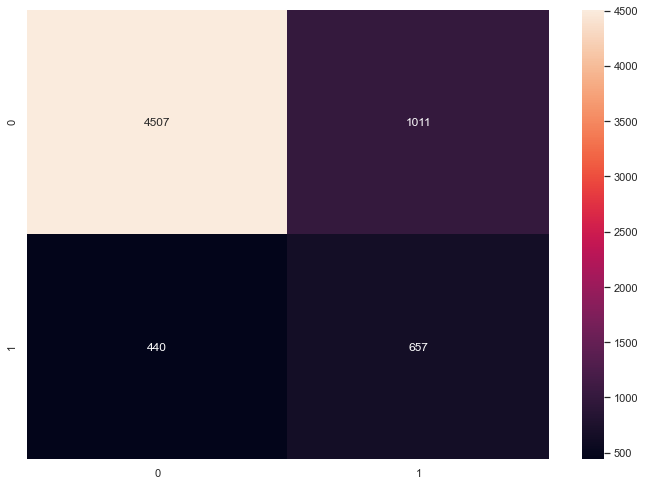

In [217]:
sns.heatmap(confusion_matrix(y_test, grid_search.predict(X_test)), annot= True, fmt ='.0f')

In [218]:
from sklearn.metrics import roc_auc_score, roc_curve

In [219]:
round(roc_auc_score(y_test, grid_search.predict(X_test)),3)

0.708

(array([4605.,   85.,   82.,   49.,   40.,   28.,   22.,   20.,   30.,
          25.,   15.,   12.,   30.,   23.,   22.,   23.,   22.,   25.,
          42., 1415.]),
 array([1.00373751e-43, 5.00000000e-02, 1.00000000e-01, 1.50000000e-01,
        2.00000000e-01, 2.50000000e-01, 3.00000000e-01, 3.50000000e-01,
        4.00000000e-01, 4.50000000e-01, 5.00000000e-01, 5.50000000e-01,
        6.00000000e-01, 6.50000000e-01, 7.00000000e-01, 7.50000000e-01,
        8.00000000e-01, 8.50000000e-01, 9.00000000e-01, 9.50000000e-01,
        1.00000000e+00]),
 <BarContainer object of 20 artists>)

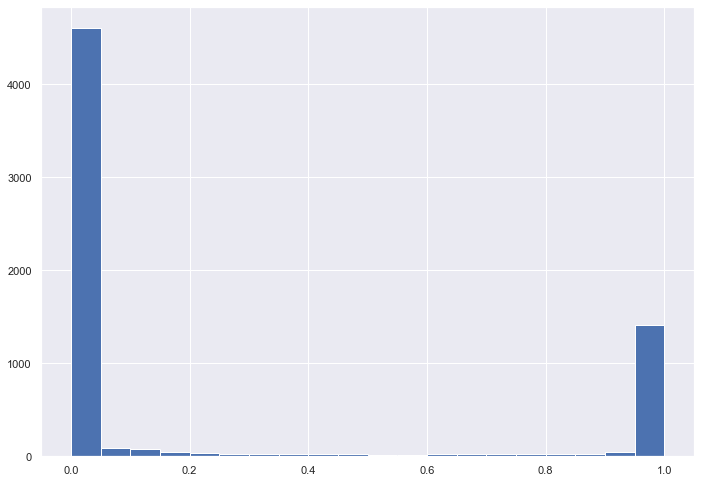

In [113]:
dist_pred = pd.DataFrame(grid_search.predict_proba(X_test))

plt.hist(dist_pred[1],bins = 20)

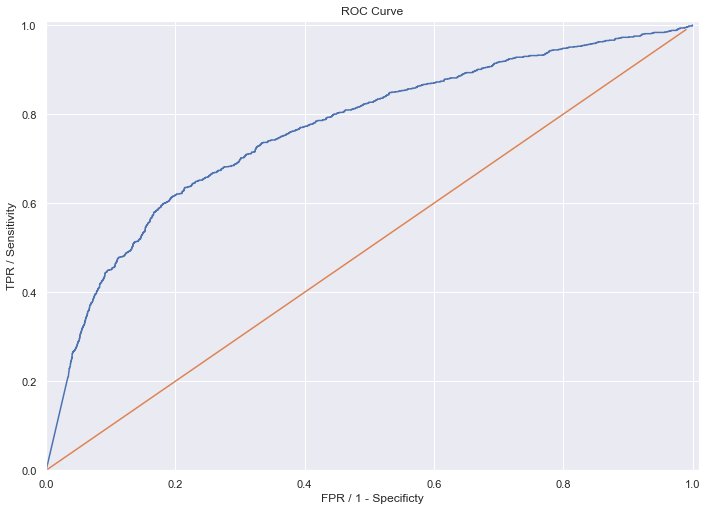

In [114]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, dist_pred[1])
df_roc = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

#Curva ROC 
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('FPR / 1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_roc['fpr'],df_roc['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
#plt.show()

In [115]:
 pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050275,0.011922,0.029200,0.013178,GaussianNB(),NaN,{'classifier': GaussianNB()},0.570156,0.588889,0.571111,0.564444,0.560000,0.570920,0.009846,1
1,0.096958,0.025018,0.024656,0.013784,LogisticRegression(),0.01,"{'classifier': LogisticRegression(), 'classifi...",0.129176,0.153333,0.151111,0.126667,0.133333,0.138724,0.011247,52
2,0.144297,0.023850,0.024345,0.003987,LogisticRegression(),0.213878,"{'classifier': LogisticRegression(), 'classifi...",0.229399,0.262222,0.235556,0.226667,0.213333,0.233435,0.016121,51
3,0.179598,0.021236,0.026264,0.008274,LogisticRegression(),0.417755,"{'classifier': LogisticRegression(), 'classifi...",0.231626,0.271111,0.244444,0.233333,0.217778,0.239659,0.017863,50
4,0.181167,0.033800,0.023668,0.004766,LogisticRegression(),0.621633,"{'classifier': LogisticRegression(), 'classifi...",0.238307,0.271111,0.246667,0.233333,0.217778,0.241439,0.017568,49
5,0.172358,0.014408,0.024091,0.004974,LogisticRegression(),0.82551,"{'classifier': LogisticRegression(), 'classifi...",0.240535,0.271111,0.248889,0.233333,0.220000,0.242774,0.017048,47
6,0.150648,0.019619,0.024579,0.003328,LogisticRegression(),1.02939,"{'classifier': LogisticRegression(), 'classifi...",0.240535,0.271111,0.248889,0.233333,0.220000,0.242774,0.017048,47
7,0.154484,0.017177,0.016506,0.004473,LogisticRegression(),1.23327,"{'classifier': LogisticRegression(), 'classifi...",0.242762,0.271111,0.248889,0.233333,0.220000,0.243219,0.017013,44
8,0.200973,0.045874,0.026279,0.004611,LogisticRegression(),1.43714,"{'classifier': LogisticRegression(), 'classifi...",0.242762,0.271111,0.248889,0.233333,0.220000,0.243219,0.017013,44
9,0.169949,0.013356,0.018043,0.005066,LogisticRegression(),1.64102,"{'classifier': LogisticRegression(), 'classifi...",0.242762,0.271111,0.248889,0.233333,0.220000,0.243219,0.017013,44
